age: age in years
sex: (1 = male; 0 = female)
cp: chest pain type
trestbps: resting blood pressure (in mm Hg on admission to the hospital)
chol: serum cholestoral in mg/dl
fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg: resting electrocardiographic results
thalach: maximum heart rate achieved
exang: exercise induced angina (1 = yes; 0 = no)
oldpeak: ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment
ca: number of major vessels (0-3) colored by flourosopy
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
target: 1 or 0

In [32]:
# Import semua the tools 

# Regular EDA 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Model Evaluasi
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve




In [33]:
#ambil data CSV
dataset = pd.read_csv("E:/heart.csv") 
dt=dataset
dt

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Dalam data yang ada terdapat total 303 baris data dengan 14 kolom 

In [34]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Nama pada kolom dan tipe datanya

In [35]:
dt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [36]:
dt.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [37]:
dt["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

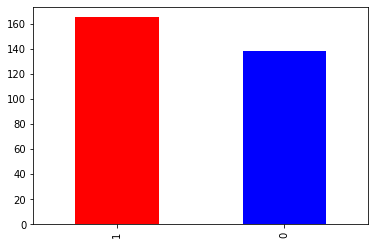

In [38]:
dt["target"].value_counts().plot(kind="bar", color=["red", "blue"]);

In [39]:
# mengechek apakah ada data yang hilang
dt.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [40]:
dt.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


MENGECEK PENYAKIT JANTUNG BERDASARKAN GENDER

In [41]:
dt.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [42]:
# perbandingan target dengan gender column
pd.crosstab(dt.target, dt.sex)

sex,0,1
target,,
0,24,114
1,72,93


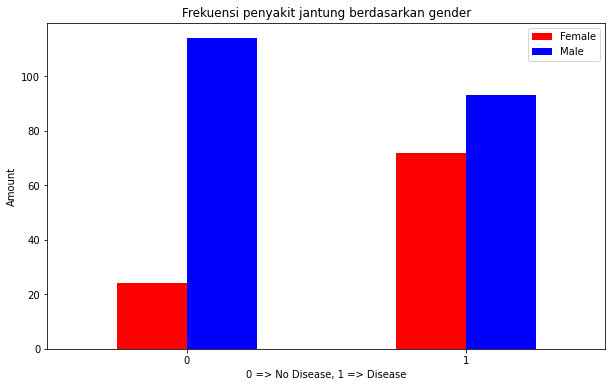

In [43]:
# Create of plot of crosstab
pd.crosstab(dt.target, dt.sex).plot(kind="bar", figsize=(10,6), color=["red", "blue"])
plt.title("Frekuensi penyakit jantung berdasarkan gender")
plt.xlabel("0 => No Disease, 1 => Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

Age vs Max Heart Rate for Heart Disease

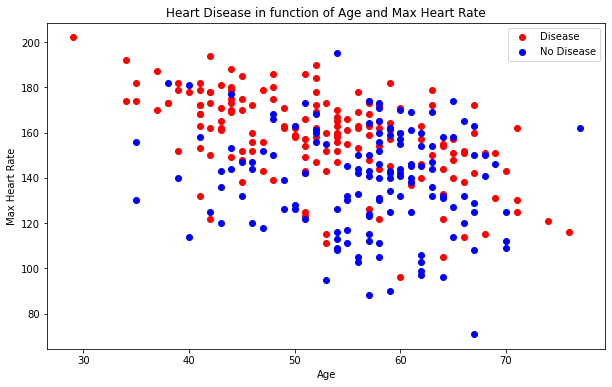

In [44]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter positive sempel
plt.scatter(dt.age[dt.target == 1],
            dt.thalach[dt.target == 1],
            c="red")

# Scatter negative sempel
plt.scatter(dt.age[dt.target == 0],
            dt.thalach[dt.target == 0],
           c="blue");

# Display
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

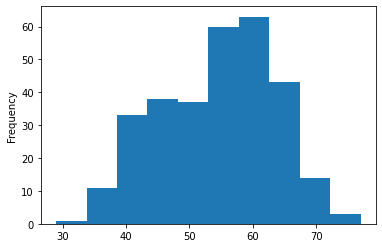

In [45]:
# Check the distribution of the age column with a histogram
dt.age.plot.hist();

In [46]:
# korelasi ke matrix
dt.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


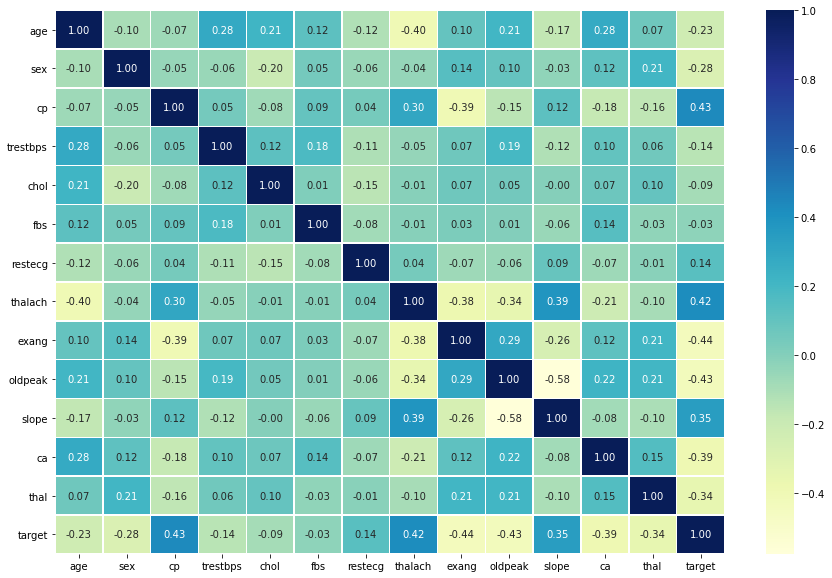

In [47]:
corr_matrix = dt.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

In [48]:
# Modeling

# Split data kedalam X & y
X = dt.drop("target", axis=1)
y = dt["target"]

In [49]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [50]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [51]:
# Split data ke train dan test sets
np.random.seed(42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [52]:
len(X_train), len(X_test), len(y_train), len(y_test)

(242, 61, 242, 61)

Setelah data kita split ke dalam training dan test set, lalu membuat machine learning model.
kita akan menguji data untuk menemukan patterns pada data set
dalam pengujian ini kita menggunakan 6 model ML yang sesuai untuk data set d atas

1. Logistic Regression
2. KNN	
3. SVM	
4. Naive Bayes	
5. Decision Tree	
6. Random Forest

In [101]:
#1. Logistic Regression
model_logreg = LogisticRegression(solver="liblinear")
model_logreg.fit(X_train, y_train)
y_pred = model_logreg.predict(X_test)
logreg_sc = accuracy_score(y_pred, y_test)
print(f"Akurasi pada ML Logistic Regression: {(logreg_sc)*100:0.2f}%");
print(classification_report(y_test, model_logreg.predict(X_test)))

Akurasi pada ML Logistic Regression: 86.89%
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [80]:
#2. KNN
train_scores = []
test_scores = []

neighbors = range(1,21)
knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

Akurasi pada ML KNN: 75.41%


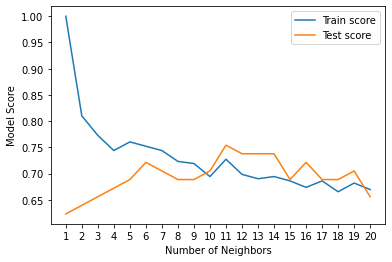

In [90]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Akurasi pada ML KNN: {max(test_scores)*100:0.2f}%");
knn_sc= max(test_scores)

In [96]:
#3. SVM
model_svm = SVC(kernel='linear')
model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_test)
svm_sc = accuracy_score(y_pred, y_test)
print(f"Akurasi pada ML SVM: {(svm_sc)*100:0.2f}%");

Akurasi pada ML SVM: 86.89%


In [97]:
#4. Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred = model_nb.predict(X_test)
nb_sc = accuracy_score(y_pred, y_test)
print(f"Akurasi pada ML Naive Bayes: {(nb_sc)*100:0.2f}%");

Akurasi pada ML Naive Bayes: 86.89%


In [98]:
#5. Decision Tree
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)
y_pred = model_tree.predict(X_test)
tree_sc = accuracy_score(y_pred, y_test)
print(f"Akurasi pada ML Decision Tree: {(tree_sc)*100:0.2f}%");

Akurasi pada ML Decision Tree: 81.97%


In [99]:
#6. Random Forest
model_forest = RandomForestClassifier(n_estimators=100) 
model_forest.fit(X_train, y_train)
y_pred = model_forest.predict(X_test)
rf_sc = accuracy_score(y_pred, y_test)
print(f"Akurasi pada ML Random Forest: {(rf_sc)*100:0.2f}%");

Akurasi pada ML Random Forest: 85.25%


In [109]:
#Hasil dari test data dengan menggunakan 6 ML
all_ml = pd.DataFrame({'model':['Logistic Regression', 'KNN', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest'], 
                         'akurasi':[logreg_sc, knn_sc, svm_sc, nb_sc, tree_sc, rf_sc]})
all_ml


,model,akurasi
0,Logistic Regression,0.868852
1,KNN,0.754098
2,SVM,0.868852
3,Naive Bayes,0.868852
4,Decision Tree,0.819672
5,Random Forest,0.852459


In [110]:
# Sort dari nilai tertinggi 
all_ml.sort_values(by="akurasi",
                 ascending=False,
                 inplace=True)
all_ml

,model,akurasi
0,Logistic Regression,0.868852
2,SVM,0.868852
3,Naive Bayes,0.868852
5,Random Forest,0.852459
4,Decision Tree,0.819672
1,KNN,0.754098


Text(0.5, 1.0, 'Rekap Akurasi Model')

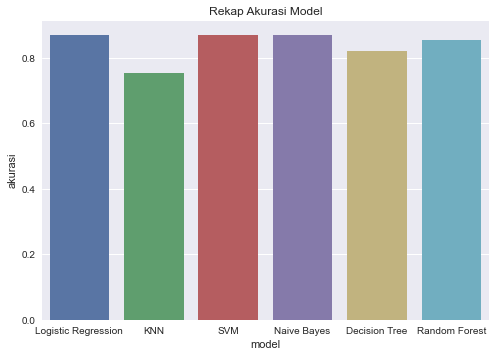

In [104]:
plt.style.use('seaborn')
sns.barplot(x=all_ml['model'],
           y=all_ml['akurasi']).set_title('Rekap Akurasi Model')

Model yang memiliki akurasi tertinggi adalah Logistic Regression, SVM dan Naive Bayes

Untuk pemodelan pada data pada penyakit jantung ini, akan lebih cocok untuk menggunakan model seperti Naive Bayes, metode ini hanya membutuhkan jumlah data pelatihan (Training Data) yang kecil untuk menentukan estimasi paremeter yang diperlukan dalam proses pengklasifikasian